# Содержание

1. Цель проекта

2. Загрузить данные и подготовить их к анализу
   - Подключение необходимых библиотек
   - Считывание файла и ознакомление с данными, проверка на дубликаты и пропуски
   - Замена значений и изменение типа данных
   - Вывод
3. Исследование данных
   - Исследование соотношений видов объектов общественного питания по количеству и построение графика
   - Исследование соотношения сетевых и несетевых заведений по количеству. Построение графика.
   - Определим для какого вида объекта общественного питания характерно сетевое распространение?
   - Выясним что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
   - Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Определим какой вид предоставляет в среднем самое большое количество посадочных мест?
   - Выделим в отдельный столбец информацию об улице из столбца address.
   - Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и выясним — в каких районах Москвы находятся эти улицы?
   - Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и выясним — в каких районах Москвы находятся эти улицы?
4. Общий вывод
5. Рекомендации
6. Презентация

## Цель проекта

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Наша задача подготовить исследование рынка заведений общественного питания в Москве. Сделать общий вывод и дайть рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Так же рассмотреть возможность развития сети.

### Подключение необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
import plotly.express as px
from io import BytesIO
import requests

In [2]:
!pip install plotly

### Считывание файла и ознакомление с данными, проверка на дубликаты и пропуски

In [3]:
path = '/datasets/'
data = pd.read_csv(path + 'rest_data.csv')
display(data.head())
display(data.isna().sum())
display(data.duplicated().sum())
data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


### Дубликаты и пропуски в исходном файле отсутствуют

In [4]:
#Приведем название в столбцах к нижнему регистру
data['object_name'] = data['object_name'].str.lower()
data['address'] = data['address'].str.lower()
display(data.head())

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


### Замена значений и изменение типа данных

In [5]:
#Проведем замену значений в столбцах на более корректный вид
#Заменем да на True, а нет на False, так мы сможем производить математические операции с данными
#'предприятие быстрого обслуживания' - громоздкое и неактуальное название типа заведения, заменем его
data['chain'] = data['chain'].map({'да': True, 'нет': False})
data['object_type'] = data['object_type'].replace('предприятие быстрого обслуживания', 'фаст-фуд')
display(data.head())

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


### Вывод:

Данные достаточно чистые, дубликаты и пропуски отсутствуют.
В столбце chain Да и Нет, заменены на True и False (это необходимо, чтобы иметь возможность производить мат. вычисления с данными столбца).
Дубликаты не выявлены.
Значения "0" в столбце 'number' считать ошибкой иил как-то заменять не будем, потому как подобные заведения действительно встречаются: продажа шаурмы, пирожки и пончики и др. Такие заведения быстрого питания имеют лишь окно продажи, а посадочные места отсутствуют. В некоторых случаях это просто магазин. В других случаях скорее данные просто не указали.

## Исследование данных

### Исследование соотношений видов объектов общественного питания по количеству и построение графика

In [6]:
data_counts = data[['object_type', 'id']].groupby('object_type').agg({'id': 'count'}).sort_values('id').reset_index()
display(data_counts.head(15))
data_counts.columns

,object_type,id
0,магазин (отдел кулинарии),273
1,закусочная,360
2,кафетерий,398
3,буфет,585
4,бар,856
5,фаст-фуд,1923
6,ресторан,2285
7,столовая,2587
8,кафе,6099


Index(['object_type', 'id'], dtype='object')

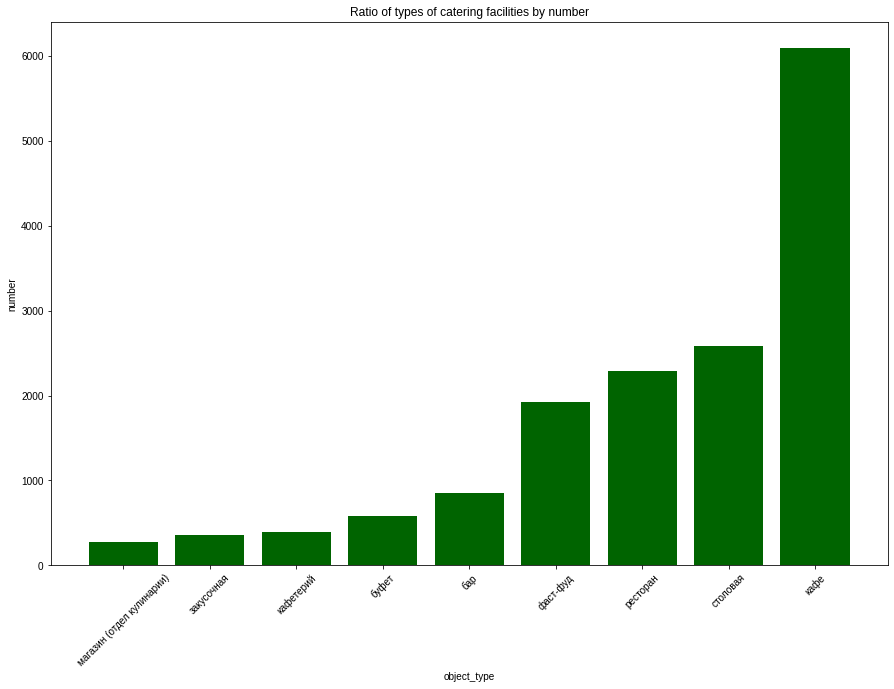

In [7]:
#Построим график количества объектов сгрупированных по типу заведения
#На этом шаге будем использовать библиотеку matplotlib
fig, ax1 = plt.subplots()
plt.bar(data_counts['object_type'], data_counts['id'], color='#006400')
plt.style.use('seaborn')
ax1.set_title('Ratio of types of catering facilities by number')
ax1.set_xlabel('object_type')
ax1.set_ylabel('number')
fig.set_figheight(10)
fig.set_figwidth(15)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45) #цикл для наклона подписей по оси х, это сделает длинные записи читабельными
plt.show()

Больше всех заведений типа кафе, с отрывом от второго места (столовая) в 2,4 раза. Ресторан лишь немного уступил, примерно 300 единиц. Меньше всего магазинов и закусочных, в подобных заведениях места посадки для клиентов могут вовсе отсутствовать.

### Исследование соотношения сетевых и несетевых заведений по количеству. Построение графика.

In [8]:
#Посчитаем количество заведений распределив по признаку отношения к сети
data_net = data['chain'].value_counts().reset_index()
display(data_net.head())

,index,chain
0,False,12398
1,True,2968


Text(0.5, 1.0, 'The ratio of network and non-network establishments')

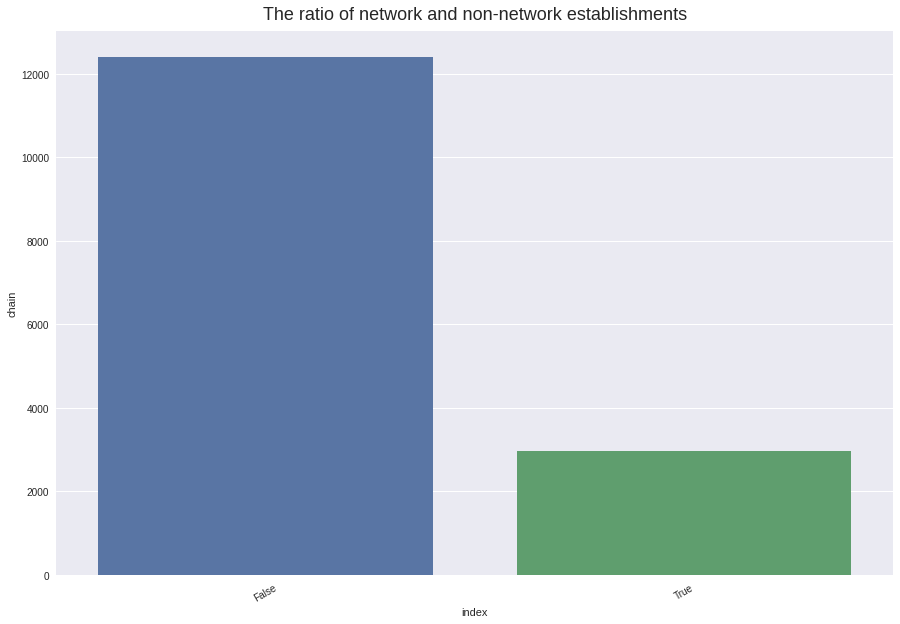

In [9]:
#На данном шаге будем использовать стобчатую гистограмму  библиотеки seaborn
plt.figure(figsize=(15,10))
ax = sns.barplot(x=data_net['index'], y=data_net['chain'])
sns.set_palette('dark')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30) #Наклон подписей по сои х в 30 градусов
ax.set_title('The ratio of network and non-network establishments', fontdict={'fontsize':18}, pad=12)

Несетевых заведений  в 4,18 раза больше чем сетевых

### Определим для какого вида объекта общественного питания характерно сетевое распространение?

Создадим сводную таблицу по всем типам заведений в соответствии с сетевым признаком

In [10]:
data_network = pd.pivot_table(data,index='object_type',columns='chain',values='id',aggfunc='count').reset_index()
data_network.columns = ['object_type', 'none_chain', 'chain']
data_network.head(10)

,object_type,none_chain,chain
0,бар,819,37
1,буфет,574,11
2,закусочная,304,56
3,кафе,4703,1396
4,кафетерий,346,52
5,магазин (отдел кулинарии),195,78
6,ресторан,1741,544
7,столовая,2584,3
8,фаст-фуд,1132,791


Посчитаем процентное соотношение сетевых заведений к общему количеству каждого типа

In [11]:
#Сначала создадим столбец с общим числом заведений
data_network['total'] = data_network['chain'] + data_network['none_chain']
#Теперь найдем процентное соотношение
data_network['share of chain'] = round(data_network['chain'] / data_network['total'] * 100, 1)
data_network = data_network.sort_values('chain')
data_network.head(10)

,object_type,none_chain,chain,total,share of chain
7,столовая,2584,3,2587,0.1
1,буфет,574,11,585,1.9
0,бар,819,37,856,4.3
4,кафетерий,346,52,398,13.1
2,закусочная,304,56,360,15.6
5,магазин (отдел кулинарии),195,78,273,28.6
6,ресторан,1741,544,2285,23.8
8,фаст-фуд,1132,791,1923,41.1
3,кафе,4703,1396,6099,22.9


Text(0.5, 1.0, 'Number of chain')

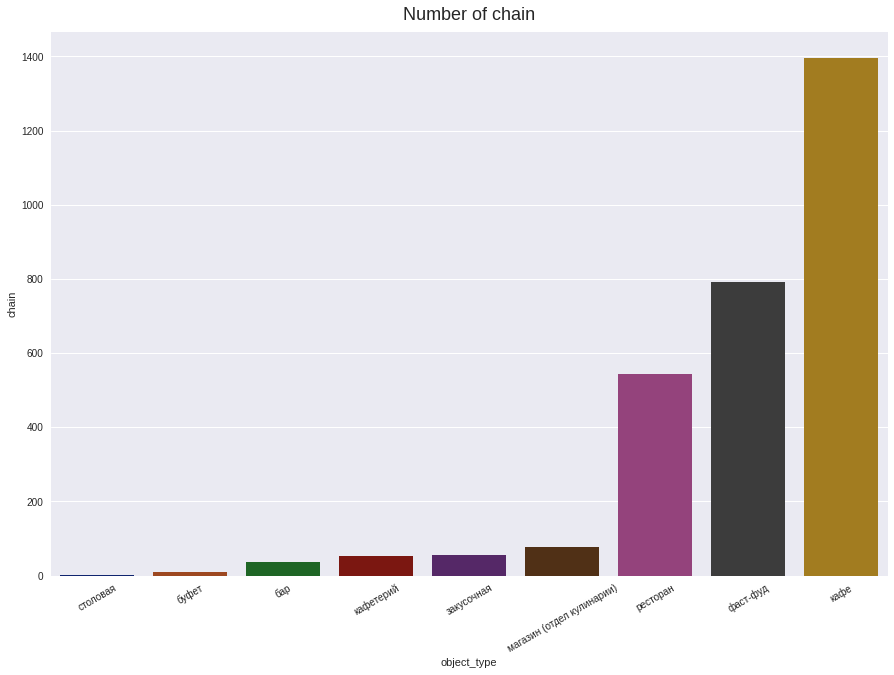

In [12]:
#Используем столбчатую гистограмму библиотеки seaborn для отображения общего количества сетевых заведений каждого типа
plt.figure(figsize=(15,10))
ax = sns.barplot(x=data_network['object_type'], y=data_network['chain'])
sns.set_palette('dark')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Number of chain', fontdict={'fontsize':18}, pad=12)

Согласно общему количеству чаще всего к сетевым заведениям относятся кафе, фаст-фуды и рестораны

In [13]:
data_network_share = data_network.sort_values('share of chain')

Text(0.5, 1.0, 'Share of chain')

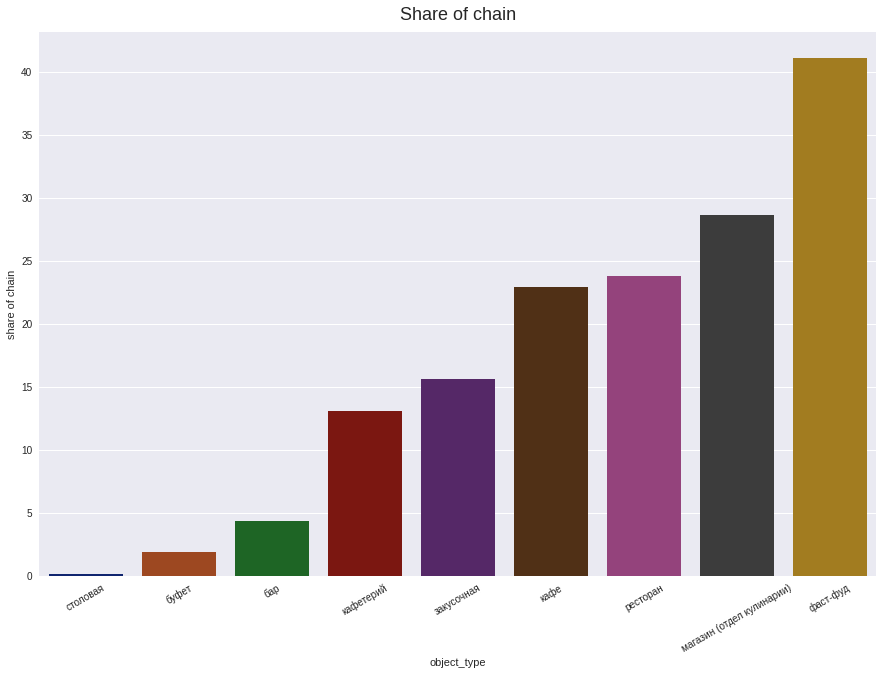

In [14]:
#Используем столбчатую гистограмму библиотеки seaborn для отображения процентного отношения сетевых заведений каждого типа
plt.figure(figsize=(15,10))
ax = sns.barplot(x=data_network_share['object_type'], y=data_network_share['share of chain'])
sns.set_palette('dark')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Share of chain', fontdict={'fontsize':18}, pad=12)

Исходя из показателей процентного соотношения характер сетевых заведений носят фаст-фуды(41%), магазины отдел кулинарии(29%), ресторан(24%) и кафе(23%). Те же результаты что и в предыдущем исследовании с той разницей, что магазинов хоть и немного они в 29% случаи являются сетевыми.

### Выясним что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

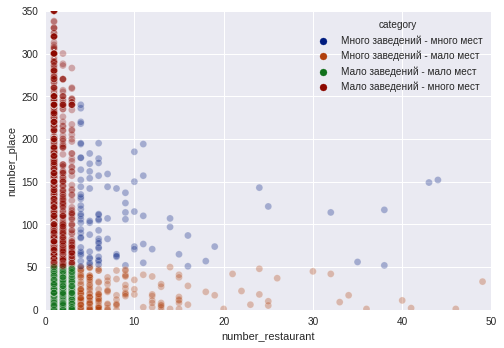

In [15]:
# выборка сетевых заведений
 
report = data.query('chain == True')
report.head()
 
#Для каждой сети посчитаем число заведений и среднее число посадочных мест.
report = data.pivot_table(index=['object_name'], values = 'number', aggfunc = ['count','mean']).reset_index() 
report.columns = ['name','number_restaurant','number_place']
report['number_place'] = report['number_place'].apply(round)
report = report.sort_values(by = ['number_restaurant'], ascending= False)
report.head()
#Разобъем все сети на 4 группы по признакам много/мало ресторанов, много/мало посадочных мест. Для этого создадим функцию category и применим её к датафрейму
 
 
# Функции для категоризации заведений - кол-ву мест 
 
def category (row):
    # определение переменных
    number_restaurant = row['number_restaurant']
    number_place = row['number_place']
 
 
    # условия для категоризации
 
    if number_restaurant <= 3 and number_place <= 50:
        return 'Мало заведений - мало мест'
 
    elif number_restaurant > 3 and number_place <= 50:
        return 'Много заведений - мало мест'  
 
    elif number_restaurant <= 3 and number_place > 50:
        return 'Мало заведений - много мест'
 
    return 'Много заведений - много мест'
# применение функции к датафрейму
report ['category'] = report.apply(category, axis=1)
report.head()
 
# построение диаграммы рассеивания
sns.scatterplot(x='number_restaurant', y='number_place', data=report, hue='category',alpha=0.3)
plt.xlim (0,50) #Ранее был указан шаг, теперь сам размер
plt.ylim (0,350)
plt.show()       

Согласно диаграмме рассеивания, характер сетевых заведений можно отнести в категорию: мало заведений-много мест

In [17]:
### КОД РЕВЬЮЕРА 2
strip_series = lambda s: s.str.lower()\
                          .str.strip()\
                          .str.replace('[^\w]','',regex=True)\
                          .str.replace("ё","е")

def is_it_big(series:pd.Series) -> pd.Series:
    # создали пустой массив той же длинны
    new_series = pd.Series(index=series.index,dtype='object')
    
    # запомнили трети
    t1, t2 = series.quantile([1/3,2/3])
    
    # поставили маленьким и большим соответствующие метки
    new_series[series.le(t1)] = False
    new_series[series.gt(t2)] = True
    # вернули
    return new_series

network = data.assign(object_code = strip_series(data.object_name))\
    .groupby("object_code")\
    .agg({"id":"count","chain":np.any,"number":"mean"})\
    .query("chain")\
    .drop("chain",axis=1)

network\
    .assign(
        frequent = is_it_big(network.id),
        roomy = is_it_big(network.number))\
    .rename(columns={"id":"objects_number","number":"seats"})\
    .groupby(['frequent','roomy'])\
    .agg({"objects_number":"count"})\
    .sort_values("objects_number",ascending=False)

objects_number
frequent roomy                
False    True               91
         False              89
True     False              47
         True               43

### Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Определим какой вид предоставляет в среднем самое большое количество посадочных мест?

In [18]:
#Для среза возьмем количество сидячих мест 400, оно является выше чем все нормальное распределение всех типов и за "бортом" 
#останутся лишь выбросы. Добавим сортировку
data_box = data.query('number <= 400')
data_box = data_box.sort_values('number', ascending=False)

Text(0.5, 1.0, 'Distribution of seats')

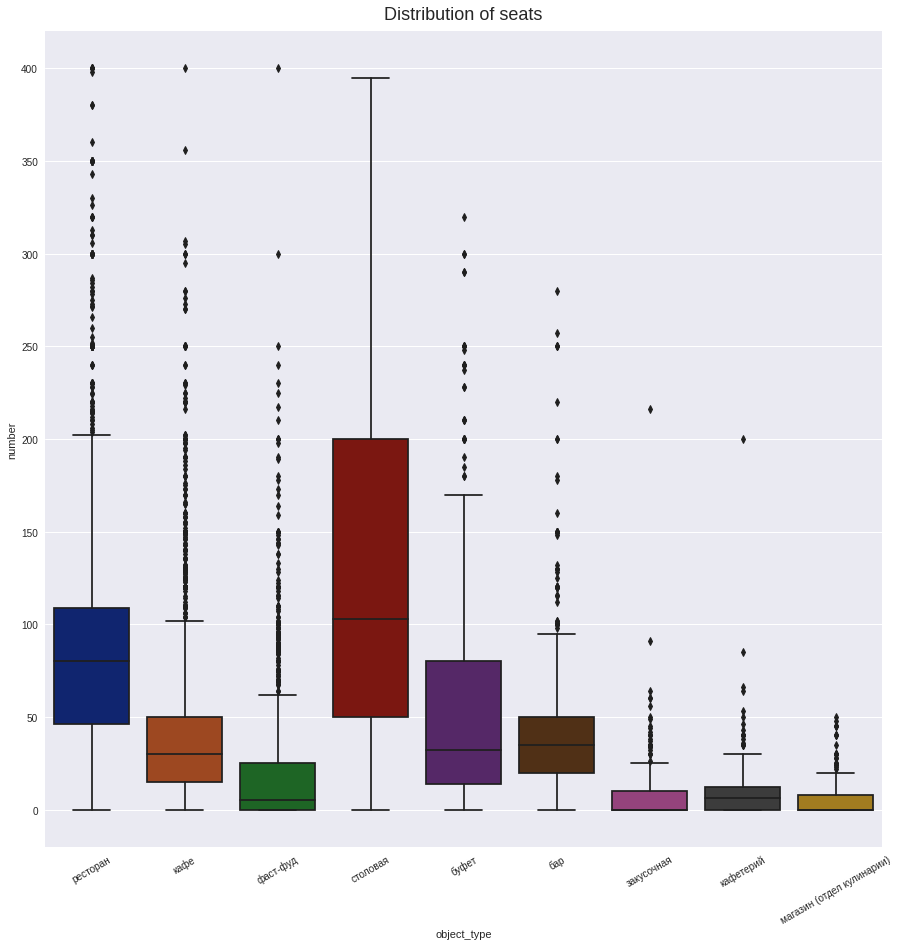

In [19]:
#Построим ящик с усами и посмотрим на распределение посадочных мест в соответствиис типом заведения 
plt.figure(figsize=(15,15))
ax = sns.boxplot(x=data_box['object_type'], y=data_box['number'], data=data_box)
sns.set_palette('dark')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Distribution of seats', fontdict={'fontsize':18}, pad=12)

Все медианные значения по типам не превышают 105 мест. Медианное значение по всем типам колеблится в районе 40 мест.

In [20]:
data_mean = data.groupby('object_type', as_index=False).agg({'number': 'median'}).sort_values('number').reset_index(inplace = False, drop = True)
data_mean['number'] = round(data_mean['number'], 0).astype('int')
data_mean.head(10)

,object_type,number
0,закусочная,0
1,магазин (отдел кулинарии),0
2,фаст-фуд,5
3,кафетерий,6
4,кафе,30
5,буфет,32
6,бар,35
7,ресторан,80
8,столовая,103


In [21]:
data_mean_null = data_mean

Text(0.5, 1.0, 'Distribution of seats')

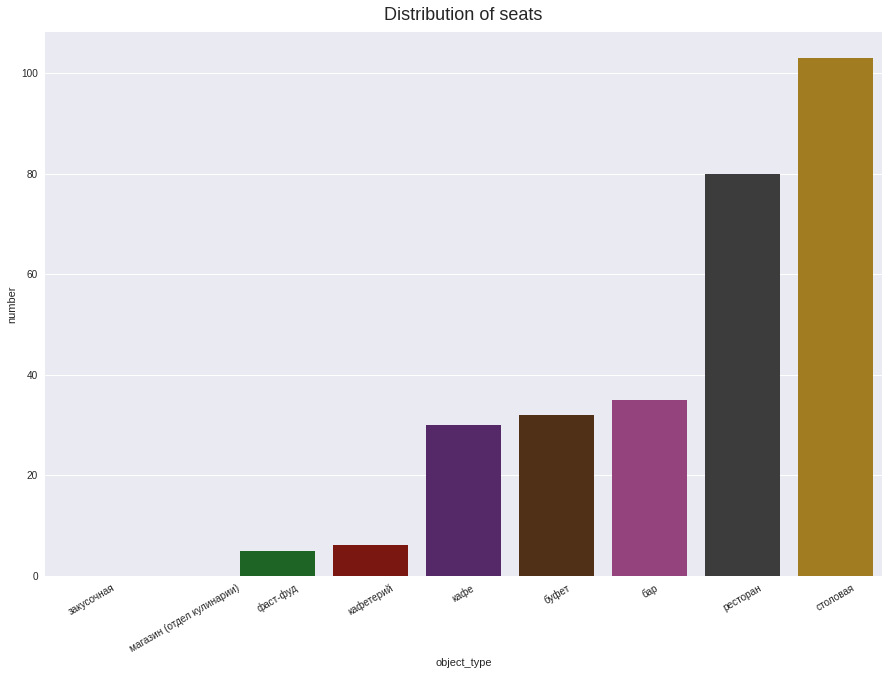

In [22]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=data_mean['object_type'], y=data_mean['number'])
sns.set_palette('dark')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Distribution of seats', fontdict={'fontsize':18}, pad=12)

Уберем нулевые значения

In [23]:
data_mean_zero = data_mean[data_mean['number'] != 0]
data_mean_zero = data_mean_zero.groupby('object_type')\
.agg({'number':'median'})\
.sort_values(by='number')\
.reset_index()
data_mean_zero.head(10)

,object_type,number
0,фаст-фуд,5
1,кафетерий,6
2,кафе,30
3,буфет,32
4,бар,35
5,ресторан,80
6,столовая,103


Text(0.5, 1.0, 'Distribution of seats')

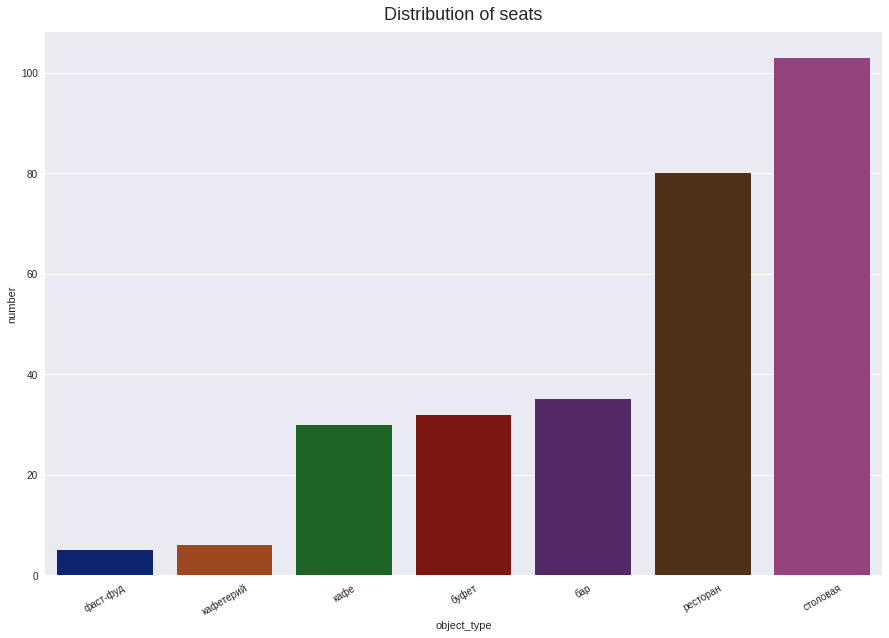

In [24]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=data_mean_zero['object_type'], y=data_mean_zero['number'])
sns.set_palette('dark')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Distribution of seats', fontdict={'fontsize':18}, pad=12)

В топ-3 вида общественного питания по среднему показателю общего числа мест вошли: столовая, ресторан, бар. Здесь больше всего сидячих мест для посетителей.
Результаты графиков и с учетом нулевого количества сидячих мест и без не отличаются.

### Выделим в отдельный столбец информацию об улице из столбца address.

Разделим информацию в столбце address по знаку ',' и создадим новый столбец street

In [25]:
#Создадим функцию, которая будет проверять наличие ключевых слов из списка в столбце и возвращать адрес
def add_street(df):
    name_street = ['улица',
                   'бульвар',
                   'шоссе',
                   'переулок',
                   'проезд',
                   'проспект',
                   'набережная',
                   'линия',
                   'тупик',
                   'километр',
                   'аллея',
                   'площадь']

    for street in df:
        for name in name_street:
            if name in street:
                return street

data['street'] = data['address'].str.split(', ').apply(add_street)
display(data.head(10))
#Проверим наличие пропусков
data['street'].isna().sum()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
5,27429,стол. при гоу сош № 1051,False,столовая,"город москва, абрамцевская улица, дом 15, корп...",240,абрамцевская улица
6,148815,брусника,True,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек
7,20957,буфет мтуси,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",90,авиамоторная улица
8,20958,кпф семья-1,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",150,авиамоторная улица
9,28858,столовая мтуси,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",120,авиамоторная улица


360

Появились пропуски, потому как, не все названия адресов содержат то или иное обращение к улице

In [26]:
#заполним пропуски в столбце street
#создадим новую функцию и изменим ключевые слова в списке поиска 
def add_region(df):
    name_region = ['посёлок',
                   'село',
                   'зеленоград',
                   'деревня',
                   'территория',
                   'просек',
                   'вблизи',
                   'квартал',
                   'микрорайон',
                   'капотня',
                   'площадь']

    for street in df:
        for name in name_region:
            if name in street:
                return street


data.loc[data['street'].isna(), 'street'] = data['address'].str.split(', ').apply(add_region)
display(data.head(10))
data['street'].isna().sum() #Посмотрим остались ли пропуски

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
5,27429,стол. при гоу сош № 1051,False,столовая,"город москва, абрамцевская улица, дом 15, корп...",240,абрамцевская улица
6,148815,брусника,True,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек
7,20957,буфет мтуси,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",90,авиамоторная улица
8,20958,кпф семья-1,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",150,авиамоторная улица
9,28858,столовая мтуси,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",120,авиамоторная улица


0

### Построим график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и выясним — в каких районах Москвы находятся эти улицы?

In [28]:
data.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


Сперва сгруппируем датафрейм по улицам и для каждой посчитаем количество заведений
Выведем топ-10 улиц

In [29]:
data_street = data.groupby('street').agg({'id': 'count'}).sort_values(by='id', ascending=False).reset_index()
data_streets = data_street.head(10)
data_streets.columns = ['street', 'count']
display(data_streets)

,street,count
0,проспект мира,204
1,профсоюзная улица,183
2,ленинградский проспект,173
3,пресненская набережная,167
4,варшавское шоссе,165
5,ленинский проспект,148
6,проспект вернадского,132
7,город зеленоград,129
8,кутузовский проспект,114
9,каширское шоссе,112


Text(0.5, 1.0, 'Distribution of seats')

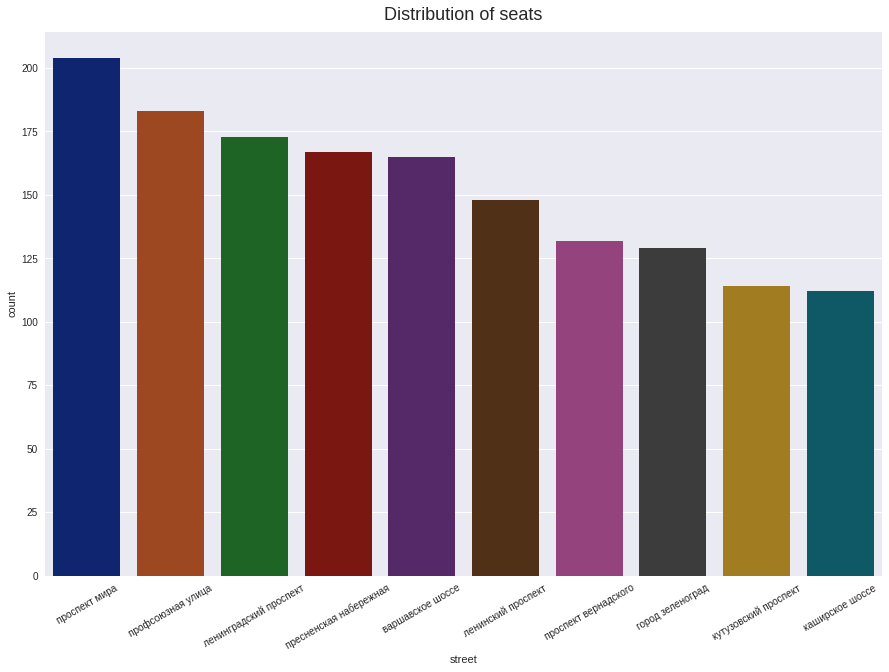

In [30]:
#Построим столбчатую гистограмму для топ-10 улиц по количеству заведений
plt.figure(figsize=(15,10))
ax = sns.barplot(x=data_streets['street'], y=data_streets['count'])
sns.set_palette('dark')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Distribution of seats', fontdict={'fontsize':18}, pad=12)

Свыше 200 заведений на Проспекте мира
Более 150 заведений располагаются на уллицах: Профсоюзная улица, Ленинградский проспект, Пресненская набережная и Варшавское шоссе.
Улицы входящие в топ-10 являются одними из самых больших по протяженности в Москве. Некоторые из них входят сразу в два административных округа, а то и в три как Ленинский проспект. На подобных улицах города логично большое скопление заведений. Исключением являются Зеленоград, т.к. это отдельный город в МО и Пресненская набережная - небольшая улица с юга огибающая район Москва-Сити, где очень большой трафик людей в день.

Теперь воспользуемся сторонней информацией и определим район и административный округ для каждой улицы из десятки лидеров

In [31]:
# обращаемся к внешнему df
spreadsheet_id = '1fGtfX_6otenOiCBRzt61bQe9l3gB7B8BEp-qPcWkRKA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
moscow_streets = pd.read_csv(BytesIO(r.content))
moscow_streets['streetname'] = moscow_streets['streetname'].str.lower()
moscow_streets = moscow_streets.rename(columns={'streetname': 'street'})
display(moscow_streets.head())

,street,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район


Соединим внешний датафрейм с нашим

In [32]:
moscow_result = data_streets.merge(moscow_streets, on='street', how='left')
#Удалим ненужные столбцы
del moscow_result['areaid']
del moscow_result['count']
moscow_result

,street,okrug,area
0,проспект мира,СВАО,Алексеевский район
1,проспект мира,СВАО,Ярославский Район
2,проспект мира,СВАО,Район Марьина роща
3,проспект мира,СВАО,Останкинский район
4,проспект мира,СВАО,Район Ростокино
5,проспект мира,СВАО,Район Свиблово
6,проспект мира,ЦАО,Мещанский район
7,профсоюзная улица,ЮЗАО,Академический район
8,профсоюзная улица,ЮЗАО,Район Черемушки
9,профсоюзная улица,ЮЗАО,Район Ясенево


Топ улиц в основном располагается в южной, юго-западной и западной частях города. Административные округи обусловлены лишь географическим расположением столь длинных улиц города, их сосредоточие выпало на эти районы. А так все улицы являются главным сообщением области и самого города в своем направлении. Потому там всегда большой трафик людей.

### Найдем число улиц с одним объектом общественного питания. Воспользуемся внешней информацией и выясним — в каких районах Москвы находятся эти улицы?

In [33]:
#Сделаем срез в который войдут улицы только с одним заведением
data_one_streets = data_street[data_street['id'] == 1]
display(len(data_one_streets))
display(data_one_streets.head())

593

,street,id
1392,улица линии октябрьской железной дороги,1
1393,архангельский переулок,1
1394,астрадамский проезд,1
1395,улица лапина,1
1396,44-й километр,1


In [34]:
#Проведем сшивание нашего df и внешнего
data_one_streets_result = data_one_streets.merge(moscow_streets, on='street', how='left')
#Удаляем ненужные столбцы
del data_one_streets_result['areaid']
del data_one_streets_result['id']
data_one_streets_result

,street,okrug,area
0,улица линии октябрьской железной дороги,САО,Тимирязевский Район
1,архангельский переулок,ЦАО,Басманный район
2,астрадамский проезд,САО,Тимирязевский Район
3,улица лапина,ЮВАО,Район Лефортово
4,44-й километр,NaN,NaN
...,...,...,...
634,деревня бунчиха,NaN,NaN
635,деревня бабенки,NaN,NaN
636,улица 9 мая,ВАО,Район Восточный
637,улица авиаконструктора микояна,САО,Хорошевский район


In [35]:
data_one_streets_result['okrug'].value_counts()

ЦАО           186
ВАО            72
СВАО           66
ЮВАО           55
САО            55
ЗАО            45
ЮАО            29
СЗАО           27
ЮЗАО           27
Зеленоград      5
Name: okrug, dtype: int64

Общее количество улиц с одним заведением равно 593
По количеству заведений лидирует ЦАО (в 2,5 раза больше по сравнению с второй строчкой рейтинга), что вполне ожидаемо т.к. это центр города. Второе третье место у ВАО и СВАО, далее показатели плавно снижаются на величину до 50%. Меньше всего соответственно в Зеленограде в СЗАО, ЮЗАО и ЮАО Москвы.

Улицы сами по себе маленькие и географически охватывают лишь несколько кварталов, потому на них и не может быть физически много заведений.

## Общий вывод:

Самое распространённое заведение - кафе. Далее Столовая, ресторан, фаст-фуд
Доля сетевых заведений небольшая - 24%. Характерно сетевое распространение в основном для Фаст-фуда. Для большинства сетевых заведений так же характерно небольшое количество посадочных мест.
В среднем наибольшее количество мест предоставляет столовая - 103. Ресторан - 80. Бар - 35.
Большинство заведений располагаются на следующих улицах: проспект мира, профсоюзная улица, ленинградский проспект, пресненская набережная, варшавское шоссе, ленинский проспект, проспект вернадского, город зеленоград, кутузовский проспект, каширское шоссе. 
Количество единичных заведений расположенных на одну улицу - 593.
Оптимальное количество посадочных мест 40 - 50.

## Рекомендации:

Наиболее перспективным заведением будет фаст-фуд с оптимальным количеством мест 40-50. У заведений фаст-фуд наибольшая вероятность перерасти в сеть. 
Перспективные места: 
самым лучшим вариантом исходя из популярности места будет Пресненская набережная (район Москва-Сити, ЦАО) здесь очень высокий трафик людей(4-ое место в топ-10 по кол. заведений), да и потом высокие шансы на то что инновационную идею с роботами оценят, так же в ЦАО много туристов что соответствует стратегии оригинальности при привлечении все новых и новых клиентов; 
другим оптимальным вариантом будет выбор из топ-10 улиц ЮЗАО(Ленинский проспект, Профсоюзная улица и проспект Вернадского), здесь не так много заведений в аналогии с СЗАО и улицы обладают высоким трафиком людей, что даст неоспоримое преимущество, даже если риск конкуренции низок.

### Презентация: https://yadi.sk/i/nn6WXzmnvT51JQ